# FREQUENCY ANALYSIS

#### import dependencies

In [11]:
import numpy as np
from numpy import sin, cos, pi
from scipy.fftpack import fft, fftfreq, ifft
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
import soundfile as sf

#### load sound data

In [84]:
#load the wav file to get the sound and sampling rate
x, sr = librosa.load("../Sample-Data-Cafe-2.wav")

In [85]:
ipd.Audio(x, rate=sr)

In [86]:
# checking the sound data
print("------SOUND DATA CARD------")
print('x data type is {}'.format(type(x)))
print('x length: {} integer'.format(len(x)))
print('sr (sampling rate) data type is {}'.format(type(sr)))
print('sr (sampling rate) of the sound is : {} Hz'.format(sr))
print('the sample sound clip is {} seconds long'.format(len(x)/sr))

------SOUND DATA CARD------
x data type is <class 'numpy.ndarray'>
x length: 1657690 integer
sr (sampling rate) data type is <class 'int'>
sr (sampling rate) of the sound is : 22050 Hz
the sample sound clip is 75.17868480725623 seconds long


#### compute sound spectrum

In [87]:
#compute spectrum
spectrum=fft(x)
N = len(x)
F=fftfreq(N,1/sr)
Fpositive=np.where(F>=0)

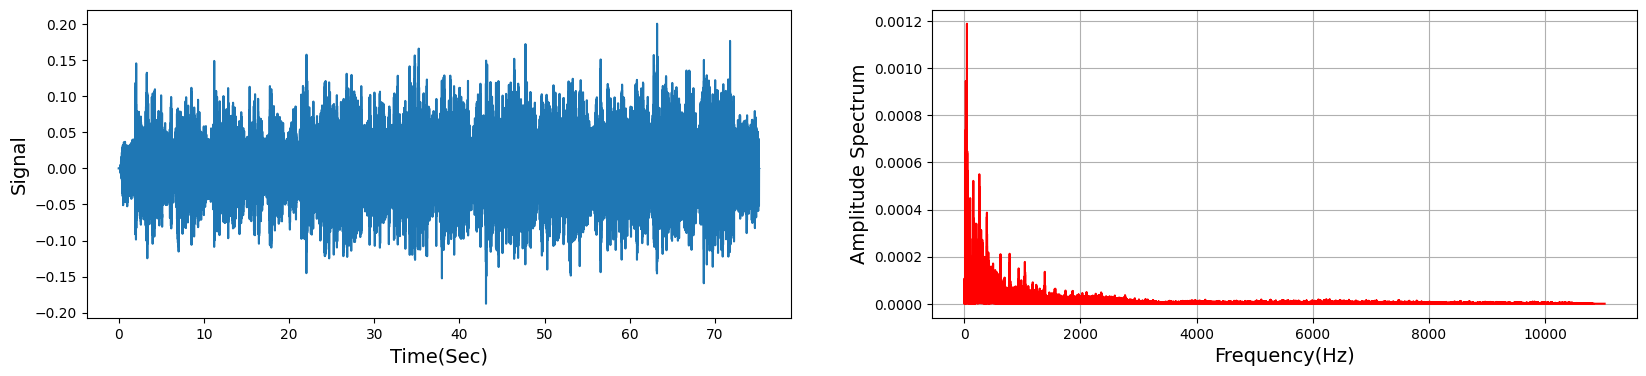

In [88]:
#@title Plot Signal & Spectrum
plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
t = np.array(range(0, len(x))) / sr
plt.plot(t,x)
plt.xlabel('Time(Sec)',fontsize=14)
plt.ylabel('Signal',fontsize=14)

plt.subplot(1,2,2)
plt.plot(F[Fpositive],np.absolute(spectrum[Fpositive])/N,color='r')
plt.xlabel('Frequency(Hz)',fontsize=14)
plt.ylabel('Amplitude Spectrum',fontsize=14)
plt.grid()

#### filter noise

In [89]:
high_threshold=1350
low_threshold=100
bandpass_filter= (np.absolute(F) >= low_threshold) & (np.absolute(F) <= high_threshold)
spectrum_filter = spectrum*bandpass_filter
signal_filter=ifft(spectrum_filter) 

spectrum_output=fft(signal_filter)

Text(0, 0.5, 'Spectrum')

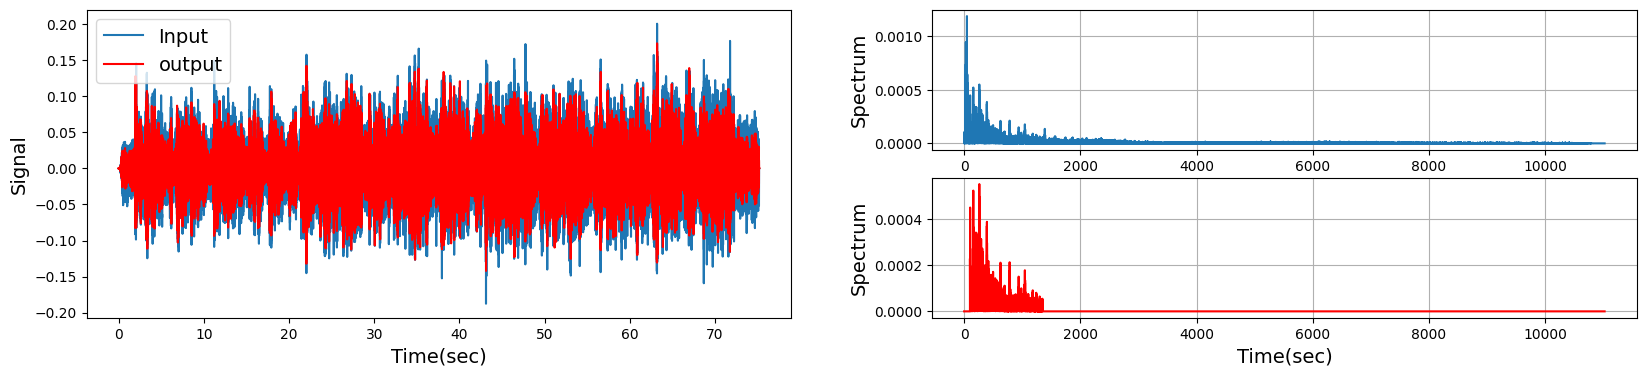

In [90]:
#@title Plot Filter Data & Spectrum
fig=plt.figure(figsize=(20,4))
gs=fig.add_gridspec(2,2)

ax1=fig.add_subplot(gs[:,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[1,1])


ax1.plot(t,x,label='Input')
ax1.plot(t,signal_filter.real,color='r',label='output')
ax1.legend(fontsize=14)
ax1.set_xlabel('Freq (Hz)',fontsize=14)
ax1.set_ylabel('Signal',fontsize=14)

ax2.plot(F[Fpositive],np.absolute(spectrum[Fpositive])/N,label='Input')
ax2.grid()
ax1.legend(fontsize=14)
ax2.set_xlabel('Freq (Hz)',fontsize=14)
ax2.set_ylabel('Spectrum',fontsize=14)


ax3.plot(F[Fpositive],np.absolute(spectrum_output[Fpositive])/N,color='r',label='Output')
ax3.grid()
ax1.legend(fontsize=14)
ax3.set_xlabel('Freq (Hz)',fontsize=14)
ax3.set_ylabel('Spectrum',fontsize=14)

#### display filtered sound

In [91]:
ipd.Audio(signal_filter, rate=sr) 

In [92]:
sf.write("filtered_audio_optimum_3.wav", signal_filter.real, sr)